In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

Original Image
Bytes : 904068


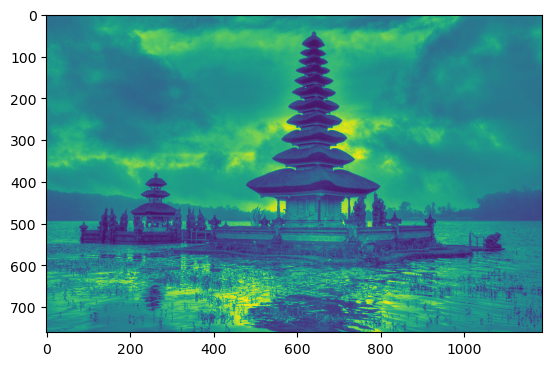

In [2]:
img = Image.open("img.jpeg").convert('L')
plt.imshow(img)
img = np.array(img)
print("Original Image")
print("Bytes : " + str(img.nbytes))

(761, 50) (50, 50) (50, 1188)
Compressed Image
Bytes : 99950
Bytes Stored in Comparison to Original : 11.06%


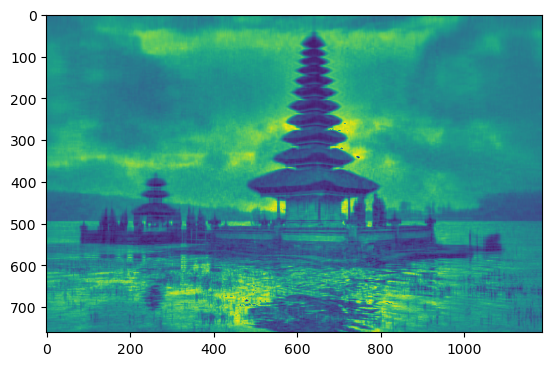

In [6]:
U, S, V_T = np.linalg.svd(img, full_matrices=False)
k = 50
U = U[:, 0:k]
S = S[0:k]
V_T = V_T[0:k, :]
print(U.shape, np.diag(S).shape, V_T.shape)
new_data = np.matmul(np.matmul(U, np.diag(S)), V_T)
new_data = np.array(np.rint(new_data), dtype=np.uint8)
plt.imshow(new_data)
print("Compressed Image")
print("Bytes : " + str(sum(x*y for (x,y) in [U.shape, np.diag(S).shape, V_T.shape])))
print("Bytes Stored in Comparison to Original : " + str(round(sum(x*y for (x,y) in [U.shape, np.diag(S).shape, V_T.shape])/img.nbytes*100.0,2)) + "%")
